In [5]:
import torch
from torch import Tensor

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
x = torch.Tensor([5,2])
y = torch.Tensor([1,5])

In [13]:
x*y

tensor([ 5., 10.])

In [16]:
torch.rand([2,5]).view([1,10])

tensor([[0.7606, 0.0788, 0.3944, 0.0967, 0.8403, 0.1354, 0.4073, 0.2112, 0.4005,
         0.0529]])

## Data: Deep Learning 2
https://www.youtube.com/watch?v=i2yPxY2rOzs

In [17]:
import torch
import torchvision
from torchvision import transforms, datasets

In [92]:
def get_data(is_train: bool=True):
    return datasets.MNIST("", train=is_train, download=True, transform = transforms.Compose([transforms.ToTensor()]))
    
def get_data_loader(dataset, **kwargs):
    return torch.utils.data.DataLoader(dataset, batch_size=kwargs["batch_size"], shuffle=kwargs["shuffle"])

    
train = get_data(True)
test = get_data(False)

In [93]:
data_loader_params = dict(batch_size=16, shuffle=True)

trainset = get_data_loader(train, **data_loader_params)
testset = get_data_loader(test, **data_loader_params)

In [46]:
x, y = data[0][0], data[1][0]

In [48]:
print(y)

tensor(0)


In [49]:
import matplotlib.pyplot as plt


In [55]:
def plot_image(data: Tensor):
    plt.imshow(data[0][0].view([28,28]))

In [53]:
type(data[0][0])

torch.Tensor

## Building neural network

In [86]:
from torch import nn
import torch.nn.functional as F
from pprint import pprint

In [76]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 48)
        self.fc3 = nn.Linear(48, 24)
        self.fc4 = nn.Linear(24, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=24, bias=True)
  (fc4): Linear(in_features=24, out_features=10, bias=True)
)


In [81]:
X = torch.rand((1, 28*28))

In [87]:
pprint(list(net.parameters()))

[Parameter containing:
tensor([[-0.0254, -0.0157,  0.0196,  ...,  0.0343, -0.0259,  0.0015],
        [-0.0114, -0.0187, -0.0106,  ...,  0.0168, -0.0011, -0.0011],
        [-0.0056, -0.0209, -0.0124,  ..., -0.0340, -0.0340,  0.0075],
        ...,
        [-0.0187,  0.0256, -0.0280,  ...,  0.0095, -0.0257, -0.0342],
        [ 0.0301, -0.0007, -0.0003,  ..., -0.0081, -0.0070,  0.0014],
        [-0.0124, -0.0339, -0.0261,  ..., -0.0187, -0.0100, -0.0338]],
       requires_grad=True),
 Parameter containing:
tensor([ 2.7688e-02,  5.3619e-03,  3.3348e-02,  1.5431e-03, -2.5041e-02,
         1.5713e-02,  1.2356e-02,  1.9706e-02, -9.3098e-03, -9.4962e-03,
        -2.8502e-02,  7.5788e-03,  1.0501e-02,  1.8855e-02, -2.9711e-02,
         3.0150e-02,  9.7010e-03,  1.6860e-03,  2.5122e-02,  1.9529e-02,
         4.5132e-04,  2.1641e-02, -2.2963e-02,  3.0670e-02,  3.1724e-02,
        -2.7925e-02, -2.8065e-02,  1.0258e-02, -1.8373e-02,  2.5526e-02,
         2.0439e-02, -6.8608e-03,  1.4730e-02, -3.0746

### Training Model

Softmax
* softmax placed at output layer of nn
* one-of-K class problems
* compute for the normalized exponential function of all units in the layer
* softmax squashes vector of size K, between 1 and 0
* because of normalization, the sum of whole vector is 1

Negative Log-Likelihood (NLL or nll_loss)
* nll is unhappy at smaller values
* because we sum the loss function to all correct classes, is when network assigns high confidence to correct class, unhappiness is low, vice versa

In [99]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 2
for epoch in range(epochs):
    for x, y in trainset:
        net.zero_grad()
        output = net(x.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2183, grad_fn=<NllLossBackward>)
tensor(0.0181, grad_fn=<NllLossBackward>)
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor(0.0938, grad_fn=<NllLossBackward>)
tensor(0.0238, grad_fn=<NllLossBackward>)


#### When trying to evaluate how good network is/data is... don't calculate gradients

In [102]:
correct = 0
total = 0
with torch.no_grad():
    for x, y in trainset:
        output = net(x.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"Acc: {round(correct/total, 3)}")

Acc: 0.99


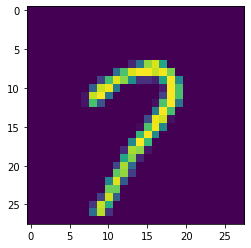

In [103]:
plt.imshow(x[0].view(28,28))

In [105]:
print(torch.argmax(net(x[0].view(-1,784))))

tensor(7)
